##### [< Forrige](5%20-%20tilbud%20og%20etterspørsel%202.ipynb)     |     [Neste >](6%20-%20oppslag%20og%20pandas.ipynb)

# 5 - Profittmaksimering

### importerer nødvendige pakker:

In [2]:
import sympy as sp
from sympy.solvers import solve
import numpy as np
from IPython.display import display, Markdown, Latex
import matplotlib.pyplot as plt
from sympy.parsing.sympy_parser import parse_expr

### Definerer produktfunksjon og parameterverdier, og plotter den:

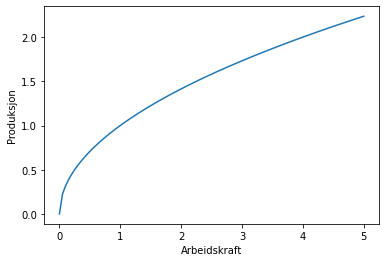

In [4]:
def f(L,a):
    return L**a

x = np.linspace(0,5,100)
_=plt.plot(x,f(x,0.5))
_=plt.xlabel('Arbeidskraft')
_=plt.ylabel('Produksjon')


### Definerer profittfunksjon:

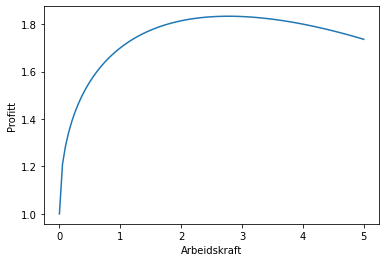

In [25]:
def profit(L,a,w,p,F):
    #
    return p*f(L,a)-w*L+F

_=plt.plot(x,profit(x,0.5,0.3,1,1))
_=plt.xlabel('Arbeidskraft')
_=plt.ylabel('Profitt')

### Finner førsteordensbetingelsene:

In [26]:
L,a,w,p,F=sp.symbols("L a w p F")
foc=sp.diff(profit(L,a,w,p,F),L)
foc

-w + L**a*a*p/L

### Løser førsteordensbetingelsen

In [27]:
L_max=solve(foc,L)[0]
profit_max=profit(L_max,a,w,p,F)
profit_max
L_max

(a*p/w)**(-1/(a - 1))

### Finner numeriske verdier

In [28]:
L_max_num=L_max.subs({a:0.5,w:0.3,p:1,F:1})
profit_max_num=profit_max.subs({a:0.5,w:0.3,p:1,F:1})

### Lager tabell:

In [32]:
tbl=f"""
|                                 | Desimalverdi                             |  Analytisk verdi              | 
| :-------------------------------| :----------------------------------------| :-----------------------------| 
| Optimal mengde arbeidskraft:     | ${np.round(float(L_max_num),1)}$         |${sp.latex(L_max)}$            | 
| Maksimal profitt                | ${np.round(float(profit_max_num),1)}$    |${sp.latex(profit_max)}$       | 

"""
display(Markdown(tbl))


|                                 | Desimalverdi                             |  Analytisk verdi              | 
| :-------------------------------| :----------------------------------------| :-----------------------------| 
| Optimal mengde arbeidskraft:     | $2.8$         |$\left(\frac{a p}{w}\right)^{- \frac{1}{a - 1}}$            | 
| Maksimal profitt                | $1.8$    |$F + p \left(\left(\frac{a p}{w}\right)^{- \frac{1}{a - 1}}\right)^{a} - w \left(\frac{a p}{w}\right)^{- \frac{1}{a - 1}}$       | 



### Plotter

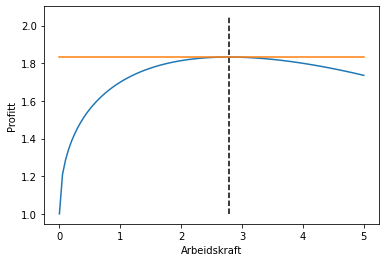

In [31]:
_=plt.plot(x,profit(x,0.5,0.3,1,1))
_=plt.plot(x,profit_max_num*np.ones(len(x)))
_=plt.vlines(float(L_max_num), 1.0, 2.05,colors=['black'],linestyles='dashed')
_=plt.xlabel('Arbeidskraft')
_=plt.ylabel('Profitt')

##### [< Forrige](5%20-%20tilbud%20og%20etterspørsel%202.ipynb)     |     [Neste >](6%20-%20oppslag%20og%20pandas.ipynb)